## Compare the performance of the scikit and the custom random forest classifiers

Tested on the Wine Quality dataset from UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/wine+quality

## Import of the dataset

In [1]:
import pandas as pd

data = pd.read_csv('winequality-red.csv')
print("Dataset Classes:")
print(data.iloc[:,-1].unique())
data

Dataset Classes:
[5 6 7 4 8 3]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Split the dataset into training and testing sets

In [2]:
x = data.drop(columns="quality")

y = data["quality"]

#split the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Search Space for Hyperparameter Tuning

In [3]:
params = dict()
# max depth list from 1 to 20
params['max_depth'] = list(range(7, 32, 2))
params['min_samples_split'] = list(range(2, 6))
params['min_samples_leaf'] = list(range(1, 5))
params['n_estimators'] = list(range(50, 401, 50))
params['max_features'] = ['sqrt']
print(params)

{'max_depth': [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4], 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400], 'max_features': ['sqrt']}


## Initialize Optimizer

In [4]:
from random_forest import CustomRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from fast_parameter_search import RandomForestGridSearchTuning

clf = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1)
search = RandomForestGridSearchTuning(clf, params, n_jobs=-1)

my_clf = CustomRandomForestClassifier(n_jobs=-1, tree_type='scikit')
my_search_scikit = RandomForestGridSearchTuning(my_clf, params, n_jobs=-1)

my_clf = CustomRandomForestClassifier(n_jobs=-1, tree_type='custom')
my_search_custom = RandomForestGridSearchTuning(my_clf, params, n_jobs=-1)



## Results

In [5]:
import time
start = time.time()
#Scikit Learn Decision Tree
#Scikit learn forest
search.fit(x_train, y_train)
print("Scikit Learn Random Forest")
print("Scikit Learn Decision Tree")
print("Best score", search.best_score)
print("Best parameters", search.best_params)
print("Time taken scikit:", time.time()-start)

#Scikit Learn Decision Tree
#Custom forest
start = time.time()
my_search_scikit.fit(x_train, y_train)
print("Custom Random Forest")
print("Scikit Learn Decision Tree")
print("Best score", my_search_scikit.best_score)
print("Best parameters", my_search_scikit.best_params)
print("Time taken custom:", time.time()-start)

# My Decision Tree
# My Forest
start = time.time()
my_search_custom.fit(x_train, y_train)
print("Custom Random Forest")
print("Custom Decision Tree")
print("Best score", my_search_custom.best_score)
print("Best parameters", my_search_custom.best_params)
print("Time taken custom:", time.time()-start)

Scikit Learn Random Forest
Scikit Learn Decision Tree
Best score 0.7107114933541829
Best parameters {'max_depth': 25, 'min_samples_split': 3, 'min_samples_leaf': 1, 'n_estimators': 300, 'max_features': 'sqrt'}
Time taken scikit: 115.15499496459961
Custom Random Forest
Scikit Learn Decision Tree
Best score 0.706020328381548
Best parameters {'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 1, 'n_estimators': 400, 'max_features': 'sqrt'}
Time taken custom: 2300.325525045395
Custom Random Forest
Custom Decision Tree
Best score 0.7068021892103206
Best parameters {'max_depth': 23, 'min_samples_split': 3, 'min_samples_leaf': 1, 'n_estimators': 400, 'max_features': 'sqrt'}
Time taken custom: 2245.188220024109


## Test the Models

## Scikit Random Forest Classifier - Scikit Decision Tree Classifier

Test Accuracy 0.6625
[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 98 31  1  0]
 [ 0  0 32 94  6  0]
 [ 0  0  0 22 20  0]
 [ 0  0  0  1  4  0]]


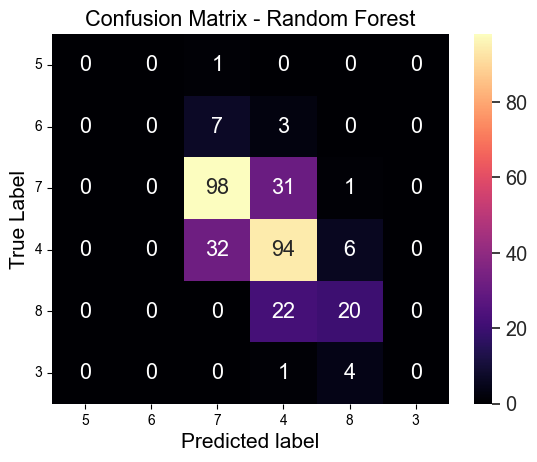

<Figure size 1000x700 with 0 Axes>

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Get the best estimator
# best = search.best_estimator
best = RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=1, min_samples_split=3, n_estimators=300, n_jobs=-1, oob_score=True, random_state=42)
# # Fit the model
best.fit(x_train, y_train)
# Predict the test data
y_pred = best.predict(x_test)
# Get the accuracy
accuracy_1 = accuracy_score(y_test, y_pred)
print("Test Accuracy", accuracy_1)
# Get the confusion matrix
confusion_1 = confusion_matrix(y_test, y_pred)
print(confusion_1)
matrix_df_1 = pd.DataFrame(confusion_1)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df_1, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Random Forest')
ax.set_xlabel("Predicted label", fontsize =15)
labels = y.unique()
ax.set_xticklabels(list(labels))
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

## Custom Random Forest Classifier - Scikit Decision Tree Classifier

Test Accuracy 0.6625


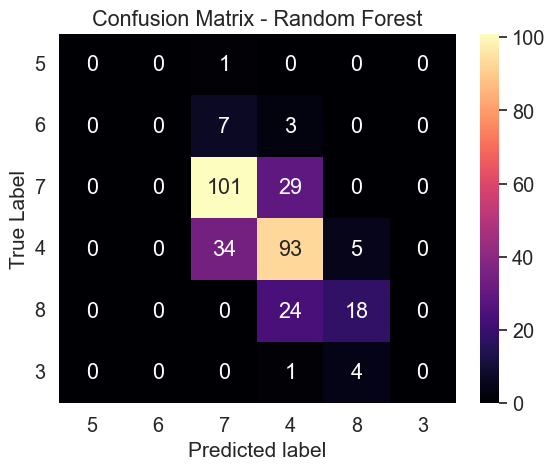

<Figure size 1000x700 with 0 Axes>

In [7]:
# Get the best estimator
# my_best_estimator = my_search_scikit.best_estimator
my_best_estimator = CustomRandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=1, min_samples_split=3, n_estimators=300, n_jobs=-1, tree_type='scikit')
# Fit the model
my_best_estimator.fit(x_train, y_train)
# Predict the test data
y_pred = my_best_estimator.predict(x_test)
# Get the accuracy
accuracy_2 = accuracy_score(y_test, y_pred)
print("Test Accuracy", accuracy_2)
# Get the confusion matrix
confusion_2 = confusion_matrix(y_test, y_pred)
matrix_df_2 = pd.DataFrame(confusion_2)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df_2, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Random Forest')
ax.set_xlabel("Predicted label", fontsize =15)
labels = y.unique()
ax.set_xticklabels(list(labels))
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

## Custom Random Forest Classifier - Custom Decision Tree Classifier

Test Accuracy 0.6625


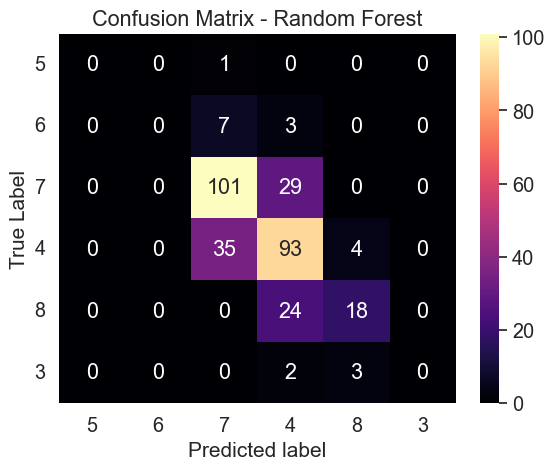

<Figure size 1000x700 with 0 Axes>

In [36]:
# Get the best estimator
# my_best_estimator = my_search_custom.best_estimator
my_best_estimator = CustomRandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=1, min_samples_split=3, n_estimators=300, n_jobs=-1, tree_type='custom')
# Fit the model
my_best_estimator.fit(x_train, y_train)
# Predict the test data
y_pred = my_best_estimator.predict(x_test)
# Get the accuracy
accuracy_3 = accuracy_score(y_test, y_pred)
print("Test Accuracy", accuracy_3)
# Get the confusion matrix
confusion_3 = confusion_matrix(y_test, y_pred)
matrix_df_3 = pd.DataFrame(confusion_3)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df_3, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Random Forest')
ax.set_xlabel("Predicted label", fontsize =15)
labels = y.unique()
ax.set_xticklabels(list(labels))
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

## Combined Results

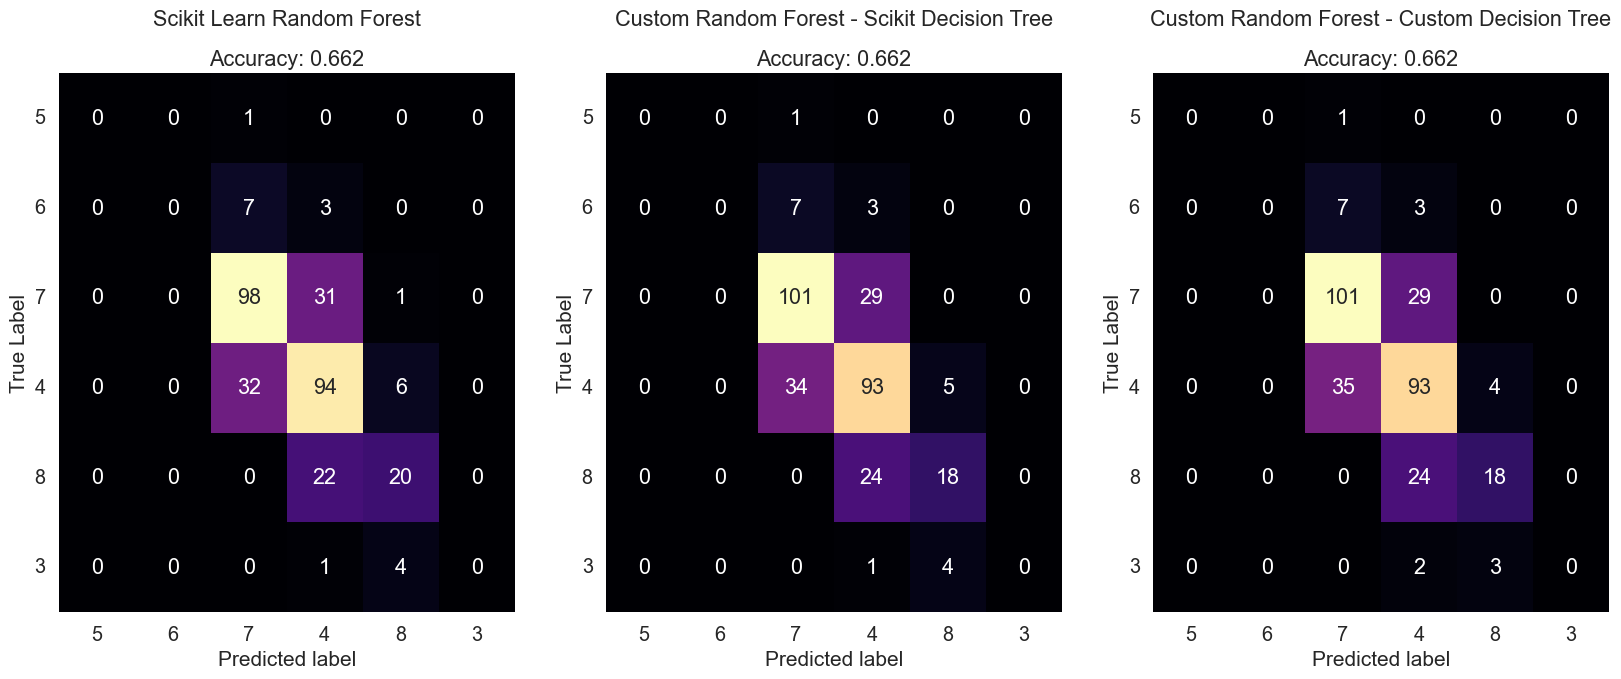

<Figure size 640x480 with 0 Axes>

In [37]:
# Draw all three confusion matrices in one figure and add acuracies to the plot
fig, axs = plt.subplots(1, 3, figsize=(20, 7))
sns.set(font_scale=1.3)
sns.heatmap(matrix_df_1, annot=True, fmt="g", ax=axs[0], cmap="magma", cbar=False)
axs[0].set_title(f"Accuracy: {accuracy_1:.3f}")
axs[0].set_xlabel("Predicted label", fontsize =15)
labels = y.unique()
axs[0].set_xticklabels(list(labels))
axs[0].set_ylabel("True Label", fontsize=15)
axs[0].set_yticklabels(list(labels), rotation = 0)
axs[0].text(0.5, 1.1, 'Scikit Learn Random Forest', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)

sns.heatmap(matrix_df_2, annot=True, fmt="g", ax=axs[1], cmap="magma", cbar=False)
axs[1].set_title(f"Accuracy: {accuracy_2:.3f}")
axs[1].set_xlabel("Predicted label", fontsize =15)
labels = y.unique()
axs[1].set_xticklabels(list(labels))
axs[1].set_ylabel("True Label", fontsize=15)
axs[1].set_yticklabels(list(labels), rotation = 0)
axs[1].text(0.5, 1.1,'Custom Random Forest - Scikit Decision Tree' , horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

sns.heatmap(matrix_df_3, annot=True, fmt="g", ax=axs[2], cmap="magma", cbar=False)
axs[2].set_title(f"Accuracy: {accuracy_3:.3f}")
axs[2].set_xlabel("Predicted label", fontsize =15)
labels = y.unique()
axs[2].set_xticklabels(list(labels))
axs[2].set_ylabel("True Label", fontsize=15)
axs[2].set_yticklabels(list(labels), rotation = 0)
axs[2].text(0.5, 1.1, 'Custom Random Forest - Custom Decision Tree', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes)

#show plot in a window and save it
plt.show()
plt.savefig('confusion_matrices.png')